In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
Pokemon = pd.read_csv('Pokemon.csv')

In [25]:
Pokemon.drop(['#'], axis='columns', inplace=True)

In [26]:
Pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Я хочу знать, количество покемонов каждого типа 1. Для этого сделаем столбчатую диаграмму распределения количества покемонов

In [58]:
Pokemon_Type_1=Pokemon.groupby('Type 1').count()[['Name']].reset_index().sort_values('Name', ascending=False).head(15)
Pokemon_Type_1.head()

,Type 1,Name
17,Water,112
12,Normal,98
9,Grass,70
0,Bug,69
14,Psychic,57


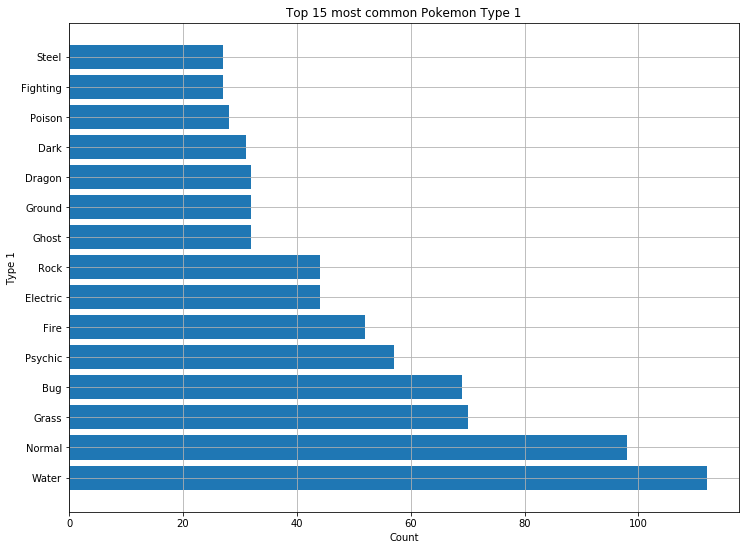

In [55]:
plt.barh(Pokemon_Type_1['Type 1'], Pokemon_Type_1['Name'])
plt.xlabel('Count')
plt.ylabel('Type 1')
plt.title('Top 15 most common Pokemon Type 1')
plt.grid()

Самые часто встречающиеся покемоны типа 1 - это водные, а самые редкие - это стальные.

А теперь посмотрим, у какой вид покемонов по типу 2 может сильнее всех атаковать.

In [59]:
import seaborn as sns

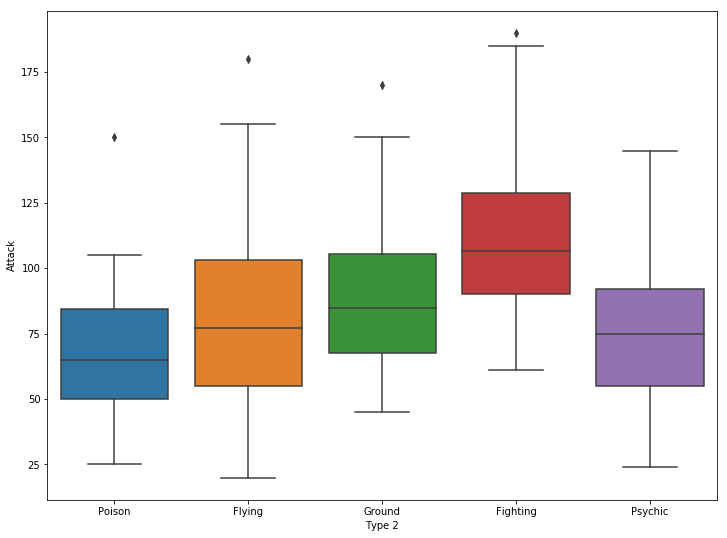

In [68]:
top_Total = Pokemon['Type 2'].value_counts().sort_values(ascending = False).head(5).index.values
top_Total
sns.boxplot(x="Type 2", y="Attack", 
            data=Pokemon[Pokemon['Type 2'].isin(top_Total)])

Как мы видим, больше половины покемонов типа Fighting превосходят по атаке 75% остальных видов покемонов. Хотя максимальная атака отдельных представителей других типов покемонов сможет превзойти 75% представителей типа Fighting

Из чего складывается средняя общая оценка покемонов по поколениям:

In [101]:
Pokemon_1 = Pokemon.groupby('Generation').mean()[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']]
Pokemon_1.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,,
1,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788


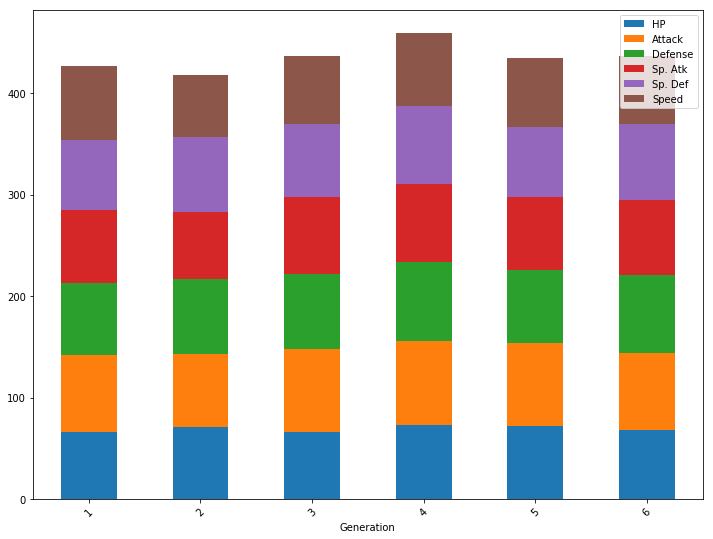

In [146]:
Pokemon_1[list(filter(lambda x: x != 'Total', Pokemon_1.columns))]\
    .plot(kind='bar', rot=45, stacked=True);

Не особо информативно получилось. Видимо потому что в каждой общей средней оценке доля каждой специальной оценки примерно одинаковая. Но зато видно, что средняя оценка 4-го поколения самая высокая.

Мы уже выяснили, что водных покемонов больше всех. Выясним, какое поколение водных покемонов самое быстрое и многочисленное.

In [144]:
Pokemon_Water=Pokemon[Pokemon['Type 1']=='Water']
Pokemon_Water_g=Pokemon_Water.groupby('Generation').agg({'Speed': ['mean','max'], 'Name': 'count'}).reset_index()
Pokemon_Water_g

Generation      Speed       Name
                   mean  max count
0          1  67.258065  115    31
1          2  56.833333   85    18
2          3  64.592593  105    27
3          4  70.000000  115    13
4          5  68.500000  108    18
5          6  78.600000  122     5

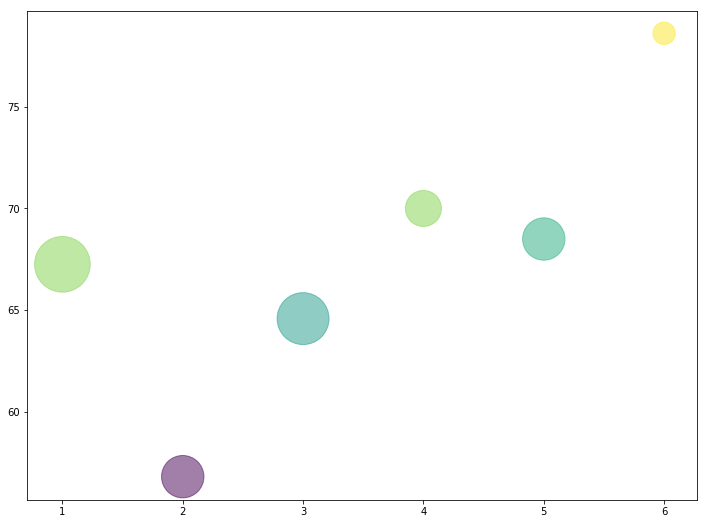

In [145]:
plt.scatter(Pokemon_Water_g['Generation'], Pokemon_Water_g['Speed']['mean'], s=Pokemon_Water_g['Name']*100, c=Pokemon_Water_g['Speed']['max'], alpha=0.5)

Координаты по лси х - это поколения, по оси у - это средняя скорость. Видно, что самая высокая средняя скорость у водных покемонов 6 поколения. Самая низкая у представителей второго. Размер круга - это количество покемонов в поколении. Самые многочисленные - покемоны 1-го поколения, самые малочисленные - 6-го. Цветом показана максимальная скорость. То есть не смотря на то, что 6-е поколение самое малочисленное, в среднем скорость у таких покемонов, при этом отдельные представители обладают самой высокой скоростью среди всех поколений.

Визуализируем средние общие оценки по типу 1 и поколениям.

In [109]:
Pokemon_Type_gen = Pokemon.pivot_table(
                        index='Type 1', 
                        columns='Generation', 
                        values='Total', 
                        aggfunc='mean').fillna(0).applymap(float)

Pokemon_Type_gen

Generation,1,2,3,4,5,6
Type 1,,,,,,
Bug,366.428571,428.750000,318.833333,373.100000,416.111111,274.666667
Dark,0.000000,465.000000,421.666667,538.333333,417.923077,483.333333
Dragon,440.000000,0.000000,596.666667,502.500000,575.000000,488.000000
Electric,444.444444,415.714286,431.000000,472.416667,446.875000,400.333333
Fairy,403.000000,323.600000,0.000000,545.000000,0.000000,450.555556
Fighting,412.142857,332.500000,382.200000,478.333333,429.285714,447.666667
Fire,481.071429,441.625000,458.750000,477.600000,431.888889,450.875000
Flying,0.000000,0.000000,0.000000,0.000000,580.000000,390.000000
Ghost,453.750000,435.000000,411.000000,530.142857,390.200000,409.900000


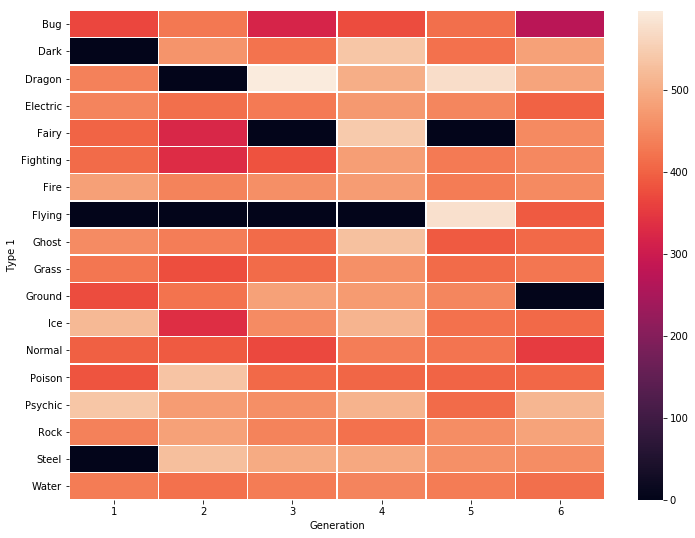

In [110]:
sns.heatmap(Pokemon_Type_gen, annot=False, 
            linewidths=0.5)

Самые высокие средние оценки у драконов из 3-го поколения. В данном случае черные квардраты - это не самые низкие средние значения. Черные квардраты - это отсутствие покемонов 1-го типа в конкретном поколении. То есть в первом поколении вообще не было стальных и летающих покемонов. 